<a href="https://colab.research.google.com/github/gahz8212/python/blob/master/%EC%BF%A0%ED%8C%A1%EC%A3%BC%EB%AC%B8%EB%9F%89%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [20]:
df=pd.read_csv('/content/drive/MyDrive/arima/coupang_timeseries_ds.csv',parse_dates=['ds'])
df

,ds,y
0,2024-01-01,5149
1,2024-01-02,4967
2,2024-01-03,5211
3,2024-01-04,5482
4,2024-01-05,6221
...,...,...
177,2024-06-26,6903
178,2024-06-27,6396
179,2024-06-28,8920
180,2024-06-29,9276


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      182 non-null    datetime64[ns]
 1   y       182 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


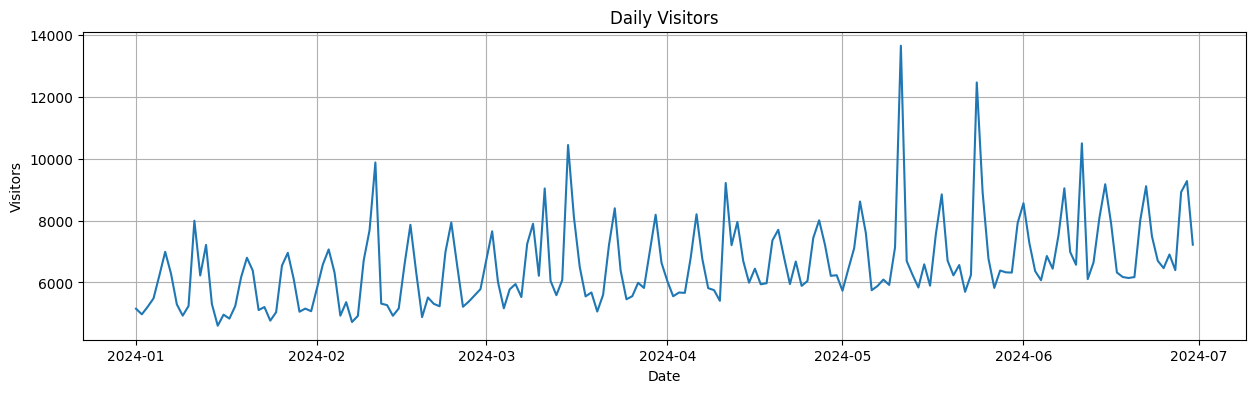

In [22]:
plt.figure(figsize=(15,4))
plt.plot(df['ds'],df['y'])
plt.title('Daily Visitors')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.grid(True)
plt.show()

In [23]:
from re import T
model=Prophet(growth='linear',daily_seasonality=True,yearly_seasonality=True)
model.fit(df)

In [24]:
future=model.make_future_dataframe(periods=30,freq='D')
future

,ds
0,2024-01-01
1,2024-01-02
2,2024-01-03
3,2024-01-04
4,2024-01-05
...,...
207,2024-07-26
208,2024-07-27
209,2024-07-28
210,2024-07-29


In [25]:
forecast=model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
207,2024-07-26,7790.697937,10142.131314,12317.299621,7790.697895,7790.697982,3437.573158,3437.573158,3437.573158,190.775615,...,887.596268,887.596268,887.596268,2359.201276,2359.201276,2359.201276,0.0,0.0,0.0,11228.271095
208,2024-07-27,7803.254501,10893.604887,12985.203110,7803.254455,7803.254548,4130.583170,4130.583170,4130.583170,190.775615,...,1716.454708,1716.454708,1716.454708,2223.352848,2223.352848,2223.352848,0.0,0.0,0.0,11933.837671
209,2024-07-28,7815.811064,9248.127937,11355.349189,7815.811016,7815.811114,2447.774563,2447.774563,2447.774563,190.775615,...,204.342056,204.342056,204.342056,2052.656893,2052.656893,2052.656893,0.0,0.0,0.0,10263.585627
210,2024-07-29,7828.367628,8078.020322,10265.219392,7828.367577,7828.367680,1291.791227,1291.791227,1291.791227,190.775615,...,-748.262229,-748.262229,-748.262229,1849.277841,1849.277841,1849.277841,0.0,0.0,0.0,9120.158854
211,2024-07-30,7840.924191,7900.522972,10067.087499,7840.924137,7840.924246,1183.868438,1183.868438,1183.868438,190.775615,...,-623.078425,-623.078425,-623.078425,1616.171248,1616.171248,1616.171248,0.0,0.0,0.0,9024.792629


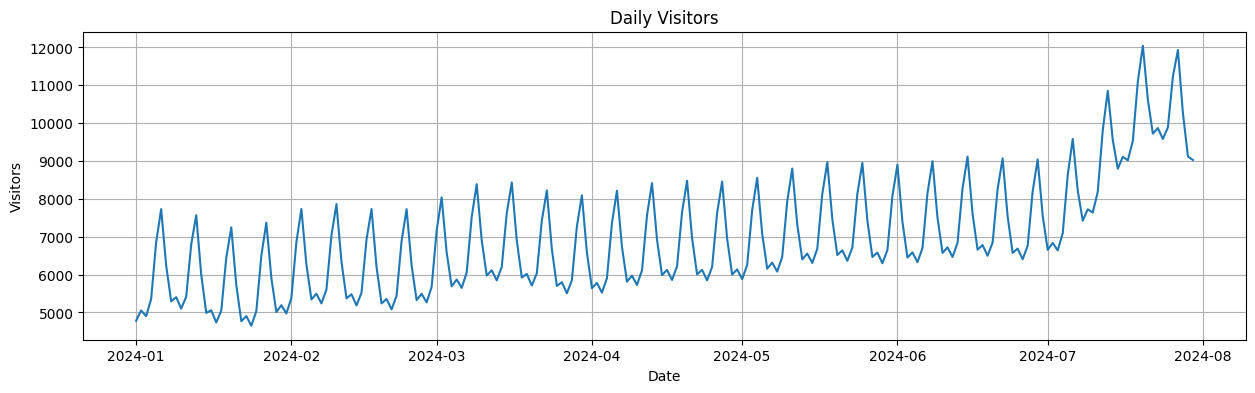

In [26]:
plt.figure(figsize=(15,4))
plt.plot(forecast['ds'],forecast['yhat'])
plt.title('Daily Visitors')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.grid(True)
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
df=pd.read_csv('/content/drive/MyDrive/arima/coupang_timeseries_ds.csv',parse_dates=['ds'])
df

,ds,y
0,2024-01-01,5149
1,2024-01-02,4967
2,2024-01-03,5211
3,2024-01-04,5482
4,2024-01-05,6221
...,...,...
177,2024-06-26,6903
178,2024-06-27,6396
179,2024-06-28,8920
180,2024-06-29,9276


In [28]:
#arima모델은 날짜타입의 컬럼이 반드시 인덱스로 설정되어 있어야 함.
#arima모델에서 사용할 수 있는 데이터 형식은 index(날짜)+값이 들어있는 컬럼
#arima모델에서는 컬럼명 상관없음
series=df.set_index('ds')['y']
series.info()

#검증은
#훈련데이터+테스트데이터를 나누어서
#훈련데이터로 훈련을 하고, 테스트데이터로 검증을 함.
#전체 2년치 데이터중 60일치만 남기고 훈련데이터로 사용하겠음
train=series[:-60]
test=series.iloc[-60:]
#train데이터로 훈련시키자.
model=ARIMA(train,order=(1,1,1))
fit=model.fit()

<class 'pandas.core.series.Series'>
DatetimeIndex: 182 entries, 2024-01-01 to 2024-06-30
Series name: y
Non-Null Count  Dtype
--------------  -----
182 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [29]:
series

,y
ds,
2024-01-01,5149
2024-01-02,4967
2024-01-03,5211
2024-01-04,5482
2024-01-05,6221
...,...
2024-06-26,6903
2024-06-27,6396
2024-06-28,8920


In [30]:
forecast_res=fit.get_forecast(steps=60)
pred_mean=forecast_res.predicted_mean
conf_int=forecast_res.conf_int()
conf_int

,lower y,upper y
2024-05-02,4173.854168,8283.998046
2024-05-03,4189.903251,8645.128172
2024-05-04,4224.179629,8753.422161
2024-05-05,4238.763999,8792.728115
2024-05-06,4242.434078,8809.428095
2024-05-07,4241.495112,8818.066762
2024-05-08,4238.748289,8823.724002
2024-05-09,4235.312012,8828.260392
2024-05-10,4231.617620,8832.370616
2024-05-11,4227.829416,8836.316001


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


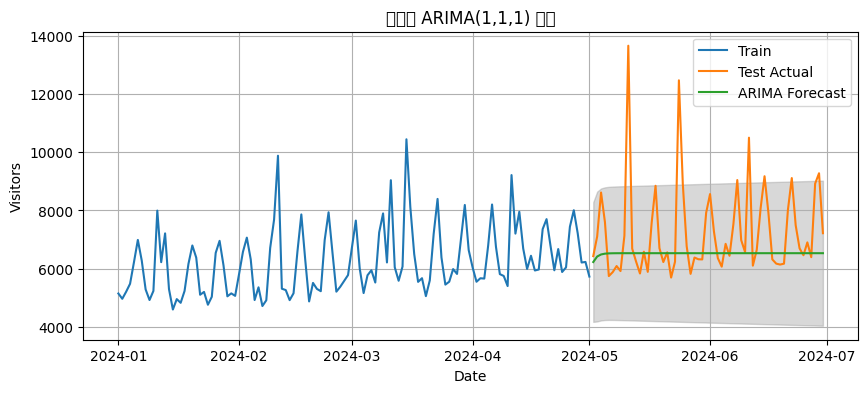

In [31]:
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test Actual")
plt.plot(pred_mean.index, pred_mean, label="ARIMA Forecast")
plt.fill_between(pred_mean.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color="gray", alpha=0.3)
plt.title("주문량 ARIMA(1,1,1) 예측")
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# 전체 데이터로 훈련시키자.
model = ARIMA(series, order=(1,1,1))
fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [33]:
forecast_res = fit.get_forecast(steps=30)
pred_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

In [34]:
conf_int['yhat'] = (conf_int['upper y'] + conf_int['lower y'])/2
conf_int

,lower y,upper y,yhat
2024-07-01,4815.096859,9738.121962,7276.609410
2024-07-02,4711.618484,9873.591785,7292.605135
2024-07-03,4696.685726,9897.255675,7296.970700
2024-07-04,4690.895367,9905.428940,7298.162153
2024-07-05,4686.532790,9910.441862,7298.487326
2024-07-06,4682.484488,9914.667657,7298.576072
2024-07-07,4678.520187,9918.680399,7298.600293
2024-07-08,4674.582603,9922.631203,7298.606903
2024-07-09,4670.656528,9926.560886,7298.608707
2024-07-10,4666.737834,9930.480565,7298.609200


In [37]:
meta = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(30)
meta

,ds,yhat,yhat_lower,yhat_upper
182,2024-07-01,6651.701978,5542.078826,7707.249832
183,2024-07-02,6836.302421,5793.119148,7932.339384
184,2024-07-03,6638.841354,5566.891239,7675.837120
185,2024-07-04,7087.547258,6036.058483,8214.659324
186,2024-07-05,8626.353955,7527.802074,9693.491537
187,2024-07-06,9583.164099,8490.574005,10633.042172
188,2024-07-07,8215.835658,7128.415771,9199.408391
189,2024-07-08,7423.758091,6332.319793,8461.391188
190,2024-07-09,7723.611539,6599.278452,8771.060840
191,2024-07-10,7637.026927,6555.637377,8706.181591


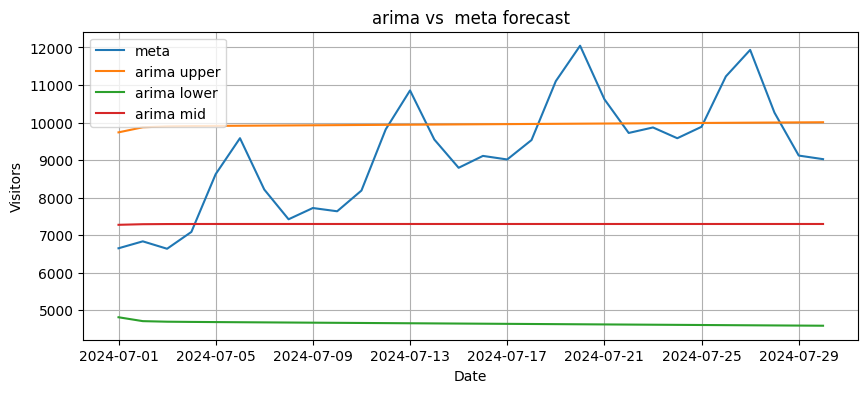

In [47]:
plt.figure(figsize=(10,4))
plt.plot(meta['ds'], meta['yhat'], label="meta")
plt.plot(conf_int.index, conf_int['upper y'], label="arima upper")
plt.plot(conf_int.index, conf_int['lower y'], label="arima lower")
plt.plot(conf_int.index, (conf_int['upper y']+conf_int['lower y'])/2, label="arima mid")
plt.title("arima vs  meta forecast")
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend() #범례
plt.grid(True)
plt.show()

In [48]:
import datetime as dt
df

,ds,y
0,2024-01-01,5149
1,2024-01-02,4967
2,2024-01-03,5211
3,2024-01-04,5482
4,2024-01-05,6221
...,...,...
177,2024-06-26,6903
178,2024-06-27,6396
179,2024-06-28,8920
180,2024-06-29,9276


In [51]:
df['weekday']=df['ds'].dt.weekday
df

,ds,y,weekday
0,2024-01-01,5149,0
1,2024-01-02,4967,1
2,2024-01-03,5211,2
3,2024-01-04,5482,3
4,2024-01-05,6221,4
...,...,...,...
177,2024-06-26,6903,2
178,2024-06-27,6396,3
179,2024-06-28,8920,4
180,2024-06-29,9276,5


In [53]:
df['is_weekend']=df['weekday'].apply(lambda x: 1 if x>=5 else 0)
df

,ds,y,weekday,is_weekend
0,2024-01-01,5149,0,0
1,2024-01-02,4967,1,0
2,2024-01-03,5211,2,0
3,2024-01-04,5482,3,0
4,2024-01-05,6221,4,0
...,...,...,...,...
177,2024-06-26,6903,2,0
178,2024-06-27,6396,3,0
179,2024-06-28,8920,4,0
180,2024-06-29,9276,5,1


In [54]:
mean_wday=df[df['is_weekend']==0]['y'].mean()
mean_wend=df[df['is_weekend']==1]['y'].mean()
mean_wday,mean_wend
#

(np.float64(6182.4384615384615), np.float64(7553.865384615385))

<BarContainer object of 2 artists>

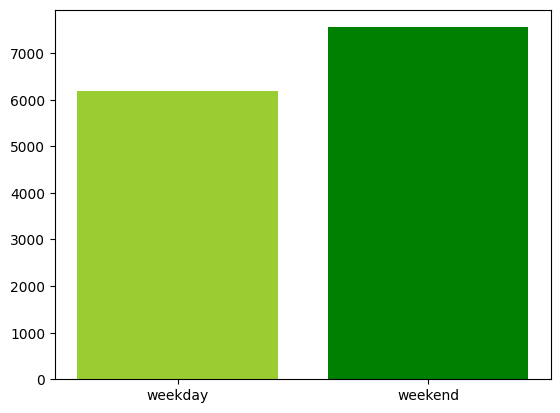

In [55]:
plt.bar(['weekday','weekend'],[mean_wday,mean_wend],color=['yellowgreen','green'])

In [59]:
df['week_name']=df['ds'].dt.day_name()
df

,ds,y,weekday,is_weekend,week_name
0,2024-01-01,5149,0,0,Monday
1,2024-01-02,4967,1,0,Tuesday
2,2024-01-03,5211,2,0,Wednesday
3,2024-01-04,5482,3,0,Thursday
4,2024-01-05,6221,4,0,Friday
...,...,...,...,...,...
177,2024-06-26,6903,2,0,Wednesday
178,2024-06-27,6396,3,0,Thursday
179,2024-06-28,8920,4,0,Friday
180,2024-06-29,9276,5,1,Saturday


In [61]:
mean_wkday=df.groupby('week_name')['y'].mean().sort_values()
mean_wkday

,y
week_name,
Wednesday,5674.653846
Monday,5797.000000
Tuesday,5934.307692
Thursday,6038.769231
Sunday,6807.500000
Friday,7467.461538
Saturday,8300.230769


Text(0, 0.5, 'mean_order')

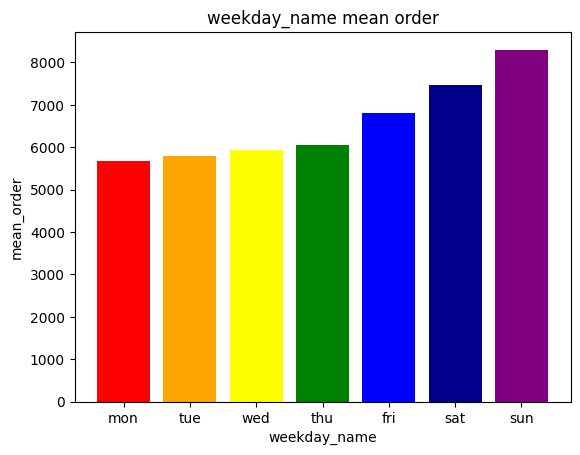

In [66]:
plt.bar(['mon','tue','wed','thu','fri','sat','sun'],mean_wkday,color=['red','orange','yellow','green','blue','darkblue','purple'])
plt.title('weekday_name mean order')
plt.xlabel('weekday_name')
plt.ylabel('mean_order')